# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,267,100,46,81,187,61,9,166,40,20,154,189,415,175,63,13,9,198,207
1,455,81,43,68,139,62,7,149,46,19,145,172,323,171,83,1,14,180,184
2,499,102,54,98,167,53,10,217,31,24,174,228,692,223,72,0,31,187,198
3,163,85,40,72,139,59,5,132,50,18,135,159,260,150,68,3,9,191,195
4,396,108,57,106,177,51,5,256,26,28,170,285,966,261,87,11,2,182,181
5,394,90,49,83,187,63,7,176,37,21,154,205,467,222,70,1,2,189,195
6,640,91,52,98,196,62,9,193,34,22,161,216,562,244,69,3,1,190,199
7,795,83,40,53,114,53,6,132,53,18,140,142,247,157,86,8,7,176,183
8,531,107,55,103,167,49,7,252,27,28,172,269,904,239,83,5,30,179,186
9,716,97,41,88,184,59,9,175,38,21,140,192,459,147,63,1,5,196,205


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,424.140255,93.743169,44.885246,82.351548,170.612022,62.027322,8.612022,169.138434,40.846995,20.606557,147.923497,189.096539,441.843352,174.479053,72.316940,6.409836,12.455373,189.229508,195.928962
std,244.006761,8.184326,6.268588,15.852948,34.962972,8.457989,5.072173,33.446042,7.820424,2.617674,14.638390,31.723540,177.749057,33.332023,7.833679,5.035057,8.754994,6.308823,7.498690
min,0.000000,76.000000,33.000000,40.000000,105.000000,48.000000,3.000000,112.000000,26.000000,17.000000,119.000000,130.000000,184.000000,109.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,213.000000,88.000000,40.000000,70.000000,141.000000,57.000000,6.000000,146.000000,33.000000,19.000000,136.000000,167.000000,317.000000,147.000000,67.000000,2.000000,5.000000,185.000000,191.000000
50%,428.000000,93.000000,44.000000,80.000000,170.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,365.000000,174.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,636.000000,100.000000,50.000000,98.000000,197.000000,66.000000,10.000000,198.000000,46.000000,23.000000,160.000000,217.000000,587.000000,199.000000,75.000000,9.000000,19.000000,194.000000,201.000000
max,845.000000,119.000000,59.000000,110.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

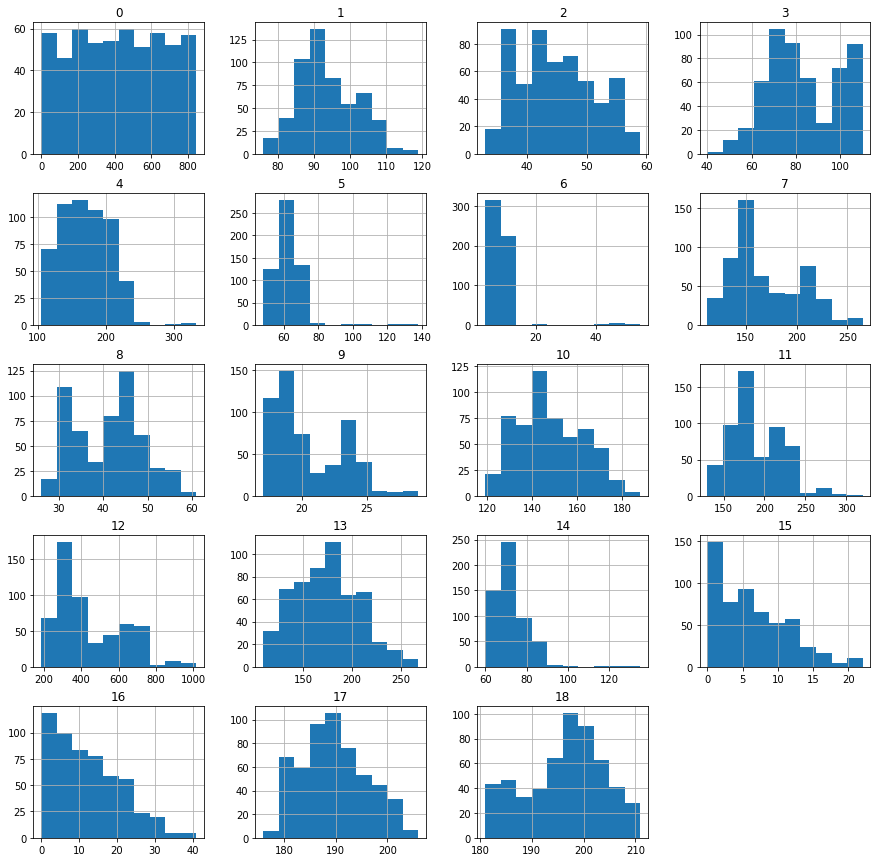

In [6]:
X_train_pd.hist(figsize=(15,15));

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [8]:
X_train = StandardScaler().fit_transform(X_train)
enc =  LabelEncoder()
enc.fit(target)
y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

Нормируем данные для корректной работы алгоритмов

In [9]:
X_train_pd = pd.DataFrame(X_train)
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.644587,0.765187,0.177994,-0.085333,0.469151,-0.121573,0.076561,-0.093921,-0.108404,-0.231927,0.415486,-0.003046,-0.151156,0.015643,-1.190429,1.310049,-0.395034,1.391463,1.477743
1,0.126586,-1.558441,-0.301019,-0.906118,-0.904982,-0.003233,-0.318107,-0.602666,0.659517,-0.614294,-0.199897,-0.539414,-0.669212,-0.104471,1.364979,-1.075414,0.176589,-1.464287,-1.592257
2,0.307074,1.009779,1.455362,0.988001,-0.103404,-1.068287,0.273895,1.432313,-1.260287,1.297540,1.783002,1.227446,1.408642,1.457013,-0.040496,-1.274202,2.120109,-0.353718,0.276439
3,-1.071193,-1.069256,-0.780032,-0.653569,-0.904982,-0.358251,-0.712775,-1.111411,1.171465,-0.996661,-0.883655,-0.949578,-1.023967,-0.735070,-0.551577,-0.677837,-0.395034,0.280893,-0.123996
4,-0.115431,1.743556,1.934375,1.493099,0.182874,-1.304965,-0.712775,2.599434,-1.900221,2.827007,1.509499,3.025858,2.951547,2.598098,1.876060,0.912472,-1.195307,-1.146981,-1.992692
5,-0.123635,-0.457775,0.657007,0.040941,0.469151,0.115106,-0.318107,0.205340,-0.492365,0.150439,0.415486,0.501771,0.141658,1.426985,-0.296036,-1.075414,-1.195307,-0.036412,-0.123996
6,0.885453,-0.335479,1.136020,0.988001,0.726801,-0.003233,0.076561,0.714085,-0.876326,0.532806,0.894117,0.848833,0.676607,2.087613,-0.423807,-0.677837,-1.309632,0.122241,0.409917
7,1.521261,-1.313849,-0.780032,-1.853177,-1.620676,-1.068287,-0.515441,-1.111411,1.555426,-0.996661,-0.541776,-1.485947,-1.097171,-0.524870,1.748290,0.316106,-0.623684,-2.098898,-1.725735
8,0.438337,1.621260,1.615033,1.303687,-0.103404,-1.541643,-0.318107,2.479729,-1.772234,2.827007,1.646251,2.521041,2.602422,1.937470,1.364979,-0.280259,2.005784,-1.622939,-1.325300
9,1.197204,0.398298,-0.620361,0.356628,0.383268,-0.358251,0.076561,0.175414,-0.364378,0.150439,-0.541776,0.091607,0.096610,-0.825156,-1.190429,-1.075414,-0.852333,1.074157,1.210786


In [10]:
y_train[:15]

array([2, 0, 1, 2, 0, 2, 1, 3, 0, 2, 0, 3, 1, 0, 3])

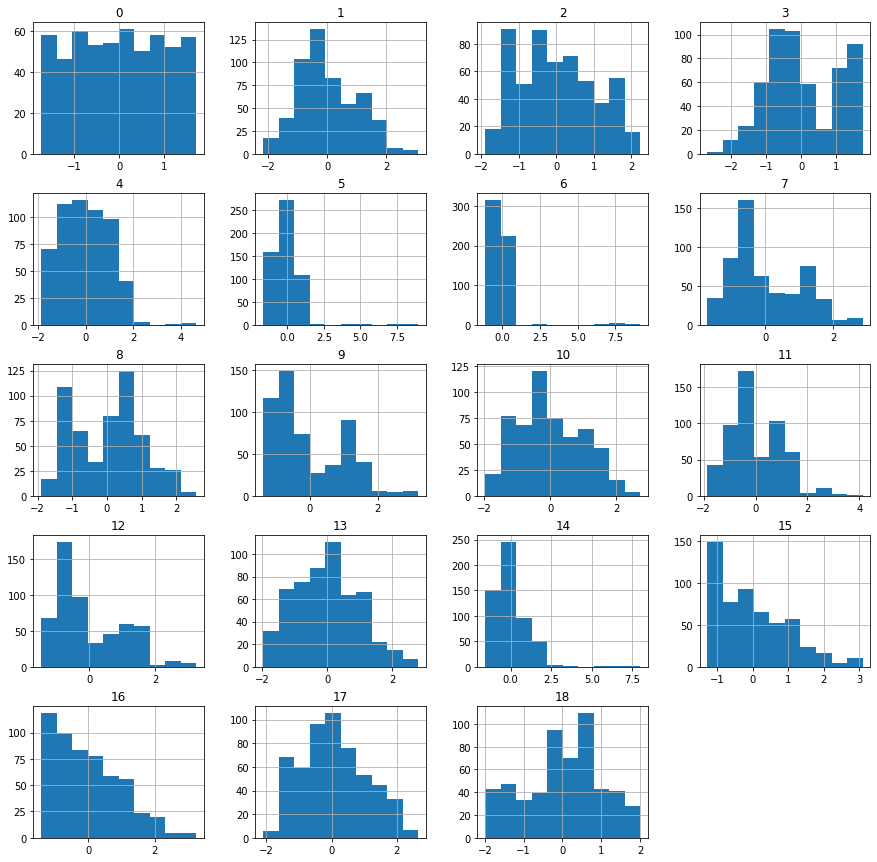

In [11]:
X_train_pd.hist(figsize=(15,15));

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, make_scorer

parameters = {'multi_class': ['multinomial'],
              'solver': ['saga'],
              'tol': [1e-3],
              'max_iter': [500],
              'penalty': ['l1', 'l2'], 
              'C': [1, 2, 3, 4, 10]}

scorers = {
  'f1_score': make_scorer(f1_score, average='weighted'),
 'accuracy_score': make_scorer(accuracy_score)
}

grid_search = GridSearchCV(estimator = LogisticRegression(),  
                           param_grid = parameters,
                           scoring = scorers,
                           cv = 5, refit='f1_score')


grid_search.fit(X_train, y_train)
basic_log_best_params = grid_search.best_params_

In [13]:
print(f"Best score: {grid_search.best_score_ :.3f}")

Best score: 0.785


In [14]:
print(f"Best params: {basic_log_best_params}")

Best params: {'C': 10, 'max_iter': 500, 'multi_class': 'multinomial', 'penalty': 'l1', 'solver': 'saga', 'tol': 0.001}


In [15]:
logreg = LogisticRegression(**basic_log_best_params).fit(X_train, y_train)

In [16]:
X_test_norm = StandardScaler().fit_transform(X_test)
y_proba = logreg.predict_proba(X_test_norm)

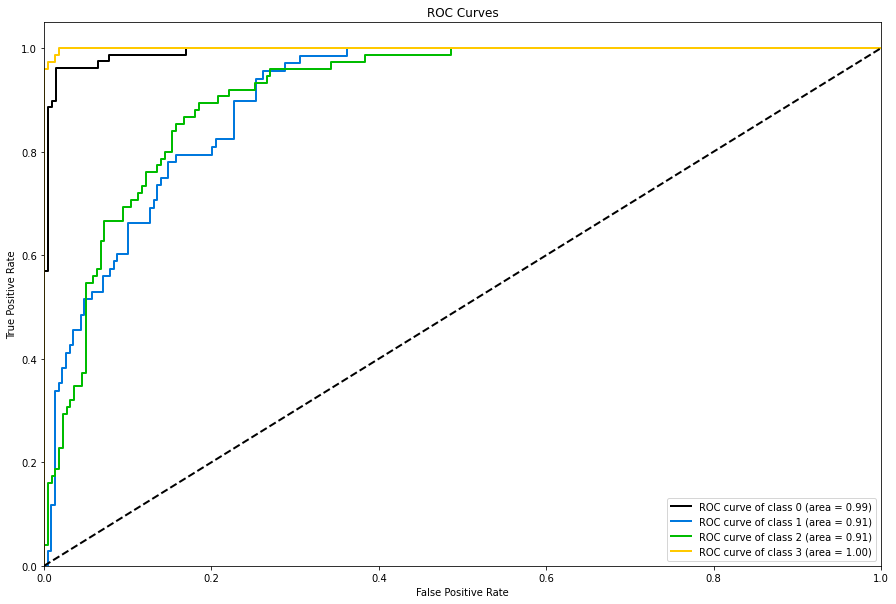

In [17]:
import scikitplot
scikitplot.metrics.plot_roc(y_test, y_proba, figsize=(15, 10), plot_micro=False, plot_macro=False);

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA()
pca.fit(X_train)

PCA()

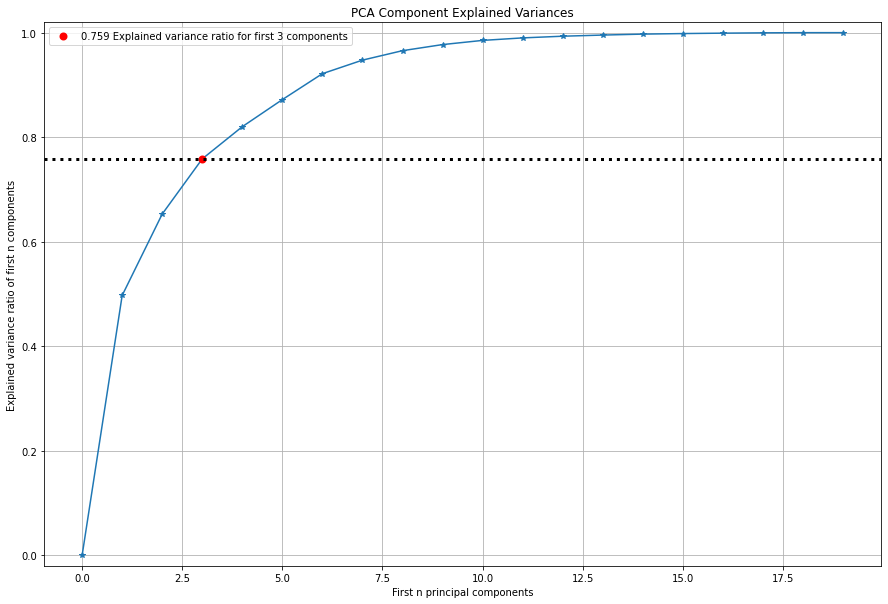

In [20]:
scikitplot.decomposition.plot_pca_component_variance(pca, figsize=(15, 10));

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [21]:
pca = PCA(n_components=13)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

Выбираем 13, так как такое количество признаков объясняет около 100% дисперсии

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [22]:
parameters = {'multi_class': ['multinomial'],
              'solver': ['saga'],
              'tol': [1e-3],
              'max_iter': [500, 1000, 2000],
              'penalty': ['l1', 'l2'], 
              'C': [1, 2, 3, 4, 10]}

scorers = {
  'f1_score': make_scorer(f1_score, average='weighted'),
 'accuracy_score': make_scorer(accuracy_score)
}

grid_search = GridSearchCV(estimator = LogisticRegression(),  
                           param_grid = parameters,
                           scoring = scorers,
                           cv = 5, refit='accuracy_score')


grid_search.fit(X_train_pca, y_train)
pca_log_best_params = grid_search.best_params_

In [23]:
print(f"Best score: {grid_search.best_score_ :.3f}")

Best score: 0.740


In [24]:
print(f"Best params: {pca_log_best_params}")

Best params: {'C': 1, 'max_iter': 500, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'saga', 'tol': 0.001}


In [25]:
logreg = LogisticRegression(**pca_log_best_params).fit(X_train_pca, y_train)

In [26]:
X_test_norm = StandardScaler().fit_transform(X_test)
X_test_norm_pca = pca.transform(X_test_norm)
y_proba = logreg.predict_proba(X_test_norm_pca)

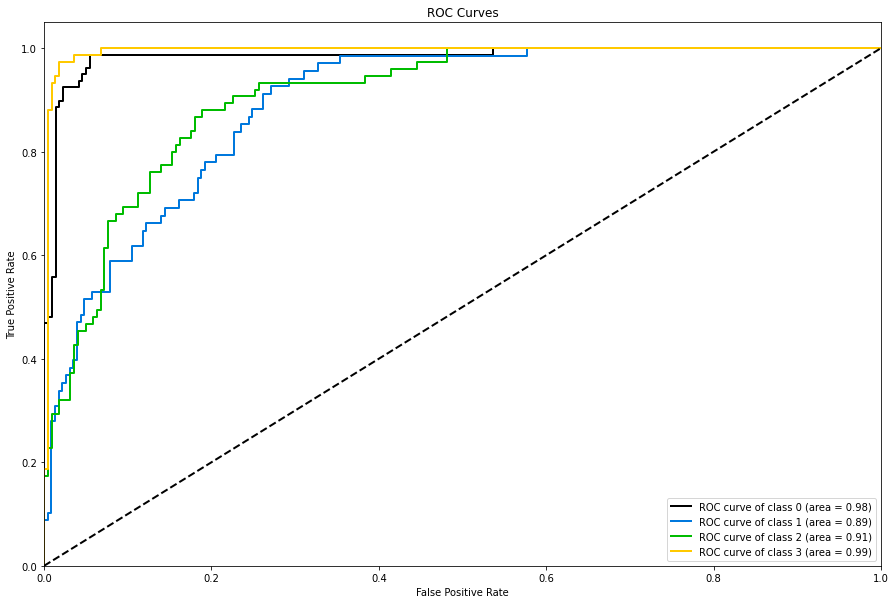

In [27]:
import scikitplot
scikitplot.metrics.plot_roc(y_test, y_proba, figsize=(15, 10), plot_micro=False, plot_macro=False);

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score, make_scorer

parameters = {'max_depth' : [3, 5, 10, 20, 50, 100]}

scorers = {
  'f1_score': make_scorer(f1_score, average='weighted'),
 'accuracy_score': make_scorer(accuracy_score)
}

grid_search = GridSearchCV(estimator = DecisionTreeClassifier(),  
                           param_grid = parameters,
                           scoring = scorers,
                           cv = 5, refit='f1_score')


grid_search.fit(X_train_pca, y_train)
tree_best_params = grid_search.best_params_


In [30]:
print(f"Best params: {tree_best_params}")

Best params: {'max_depth': 100}


In [31]:
print(f"Best score: {grid_search.best_score_ :.3f}")

Best score: 0.637


In [33]:
tree = DecisionTreeClassifier(**tree_best_params).fit(X_train_pca, y_train)

In [34]:
y_pred = tree.predict(X_test_norm_pca)

In [41]:
print(f'f1 {f1_score(y_pred, y_test, average="weighted"):.3f} acc: {accuracy_score(y_pred, y_test):.3f}')

f1 0.656 acc: 0.650


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

---

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [42]:
from sklearn.ensemble import RandomForestClassifier

res_tree = dict()
for N in range(2, 101, 5):
    clf = RandomForestClassifier(n_estimators=N)
    clf.fit(X_train, y_train)
    y_pred = clf.fit(X_train, y_train).predict(X_test_norm)
    res_tree[N] = {'f1' : f1_score(y_test, y_pred, average='weighted'), 'acc' : accuracy_score(y_test, y_pred)}

In [43]:
f1_pairs_tree = [res_tree[key]['f1'] for key in res_tree.keys()]
acc_pairs_tree = [res_tree[key]['acc'] for key in res_tree.keys()]

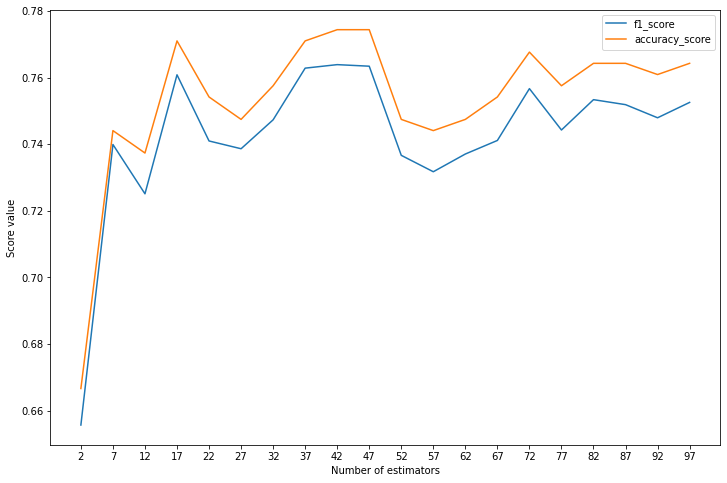

In [44]:
plt.figure(figsize=(12, 8))
plt.plot(res_tree.keys(), f1_pairs_tree , label='f1_score');
plt.plot(res_tree.keys(), acc_pairs_tree, label='accuracy_score');
plt.xlabel('Number of estimators')
plt.ylabel('Score value')
plt.xticks(list(res_tree.keys()))
plt.legend();

Наилучший выбор - 47

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [45]:
# YOUR CODE HERE
PART_SIZE = X_train.shape[0] // 10
res = {'log' : {}, 'tree' : {}, 'random_forest' : {}}
for parts in range(1, 11):
    
    X_train_part = X_train[: parts * PART_SIZE]
    y_train_part = y_train[: parts * PART_SIZE]
    
    #logreg
    
    parameters = {'multi_class': ['multinomial'],
              'solver': ['saga'],
              'tol': [1e-3],
              'max_iter': [5000],
              'penalty': ['l1', 'l2'], 
              'C': [1, 2, 3, 4]}

    scorers = {
      'f1_score': make_scorer(f1_score, average='weighted'),
     'accuracy_score': make_scorer(accuracy_score)
    }

    grid_search = GridSearchCV(estimator = LogisticRegression(),  
                               param_grid = parameters,
                               scoring = scorers,
                               cv = 5, refit='f1_score')


    grid_search.fit(X_train_part, y_train_part)
    log_best_params = grid_search.best_params_
    y_pred = LogisticRegression(**log_best_params).fit(X_train_part, y_train_part).predict(X_test_norm)
    res['log'][parts] = {'f1' : f1_score(y_test, y_pred, average='weighted'), 'acc' : accuracy_score(y_test, y_pred)}
    
    #tree
    
    parameters = {'max_depth' : [3, 5, 10, 20, 50, 100]}

    grid_search = GridSearchCV(estimator = DecisionTreeClassifier(),  
                               param_grid = parameters,
                               scoring = scorers,
                               cv = 5, refit='f1_score')


    grid_search.fit(X_train_part, y_train_part)
    tree_best_params = grid_search.best_params_
    y_pred = DecisionTreeClassifier(**tree_best_params).fit(X_train_part, y_train_part).predict(X_test_norm)
    res['tree'][parts] = {'f1' : f1_score(y_test, y_pred, average='weighted'), 'acc' : accuracy_score(y_test, y_pred)}
    
    #random forest
    
    parameters = {'n_estimators' : range(2, 50, 5)}
    grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                               param_grid=parameters,
                               scoring=scorers,
                               cv=5, refit='f1_score')
    
    grid_search.fit(X_train_part, y_train_part)
    rf_best_params = grid_search.best_params_
    y_pred = RandomForestClassifier(**rf_best_params).fit(X_train_part, y_train_part).predict(X_test_norm)
    res['random_forest'][parts] = {'f1' : f1_score(y_test, y_pred, average='weighted'), 'acc' : accuracy_score(y_test, y_pred)}
    

In [46]:
f1_pairs_log = [res['log'][key]['f1'] for key in res['log'].keys()]
acc_pairs_log = [res['log'][key]['acc'] for key in res['log'].keys()]

f1_pairs_tree = [res['tree'][key]['f1'] for key in res['tree'].keys()]
acc_pairs_tree = [res['tree'][key]['acc'] for key in res['tree'].keys()]

f1_pairs_rf = [res['random_forest'][key]['f1'] for key in res['random_forest'].keys()]
acc_pairs_rf = [res['random_forest'][key]['acc'] for key in res['random_forest'].keys()]

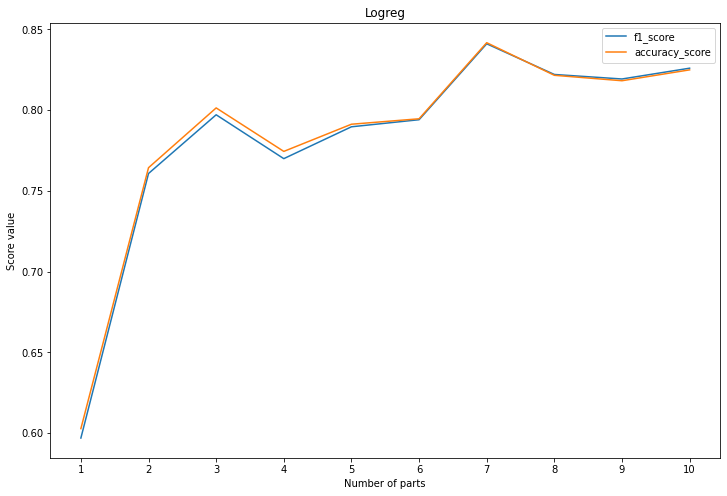

In [47]:
plt.figure(figsize=(12, 8))
plt.plot(res['log'].keys(), f1_pairs_log, label='f1_score');
plt.plot(res['log'].keys(), acc_pairs_log, label='accuracy_score');
plt.xlabel('Number of parts')
plt.ylabel('Score value')
plt.xticks(list(res['log'].keys()))
plt.legend();     
plt.title('Logreg');

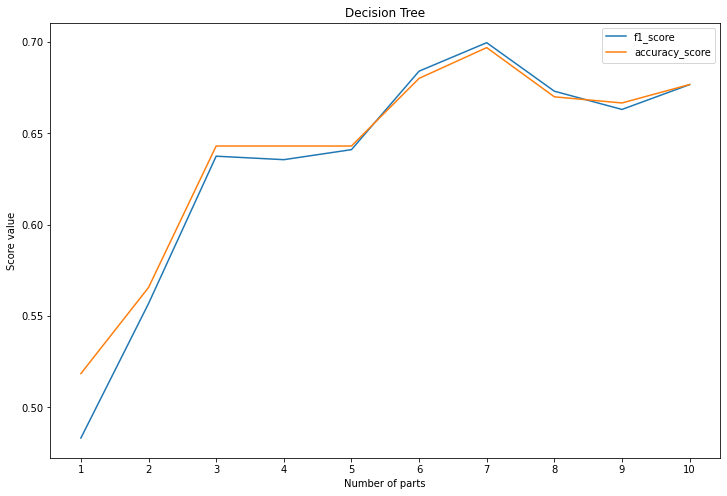

In [48]:
plt.figure(figsize=(12, 8))
plt.plot(res['tree'].keys(), f1_pairs_tree, label='f1_score');
plt.plot(res['tree'].keys(), acc_pairs_tree, label='accuracy_score');
plt.xlabel('Number of parts')
plt.ylabel('Score value')
plt.xticks(list(res['tree'].keys()))
plt.legend();                            
plt.title('Decision Tree');

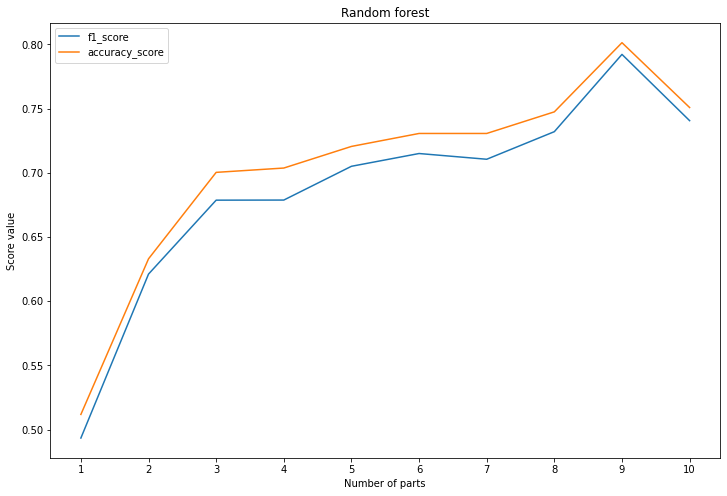

In [49]:
plt.figure(figsize=(12, 8))
plt.plot(res['random_forest'].keys(), f1_pairs_rf, label='f1_score');
plt.plot(res['random_forest'].keys(), acc_pairs_rf, label='accuracy_score');
plt.xlabel('Number of parts')
plt.ylabel('Score value')
plt.xticks(list(res['tree'].keys()))
plt.legend();
plt.title('Random forest');

Ожидаемо, что метрики растут с ростом обучающей выборки. Но в конце немного снижаются. Вероятно, это из-за переобучения или выбросов